In [1]:
# Random Forest Classification
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
fr_c = fc = pd.read_csv('Fraud_check.csv')

In [3]:
fr_c

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fr_c.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fr_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


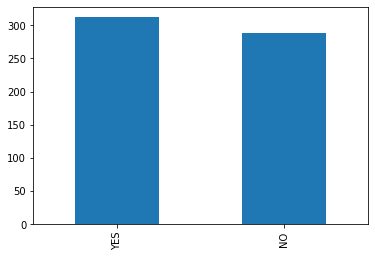

In [6]:
pd.value_counts(fr_c['Undergrad']).plot.bar()

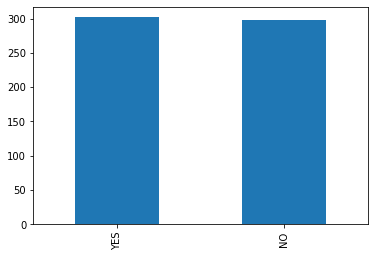

In [7]:
pd.value_counts(fr_c['Urban']).plot.bar()

In [8]:
fr_c.columns=['Undergrad','Marital Status','Taxable Income','City Population','Work Experience','Urban']

In [9]:
fr_c

,Undergrad,Marital Status,Taxable Income,City Population,Work Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [10]:
import numpy as np

In [11]:
fr_c['Tax Class'] = np.where(fr_c['Taxable Income']<=30000, True, False)#here risky income value is True and safe income value is false 

In [12]:
fr_c

,Undergrad,Marital Status,Taxable Income,City Population,Work Experience,Urban,Tax Class
0,NO,Single,68833,50047,10,YES,False
1,YES,Divorced,33700,134075,18,YES,False
2,NO,Married,36925,160205,30,YES,False
3,YES,Single,50190,193264,15,YES,False
4,NO,Married,81002,27533,28,NO,False
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,False
596,YES,Divorced,69967,55369,2,YES,False
597,NO,Divorced,47334,154058,0,YES,False
598,YES,Married,98592,180083,17,NO,False


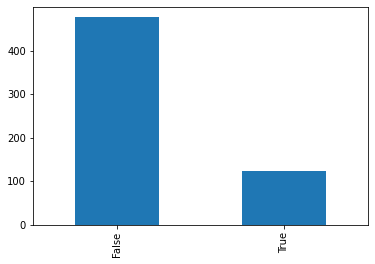

In [13]:
pd.value_counts(fr_c['Tax Class']).plot.bar()

In [19]:
from sklearn import preprocessing

In [20]:
label_encoder = preprocessing.LabelEncoder()
fr_c['Tax Class']= label_encoder.fit_transform(fr_c['Tax Class']) 

In [22]:
df =fr_c.drop(columns =['Taxable Income'])#no need of taxable income column as there is Tax Class

In [23]:
df

,Undergrad,Marital Status,City Population,Work Experience,Urban,Tax Class
0,NO,Single,50047,10,YES,0
1,YES,Divorced,134075,18,YES,0
2,NO,Married,160205,30,YES,0
3,YES,Single,193264,15,YES,0
4,NO,Married,27533,28,NO,0
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,0
596,YES,Divorced,55369,2,YES,0
597,NO,Divorced,154058,0,YES,0
598,YES,Married,180083,17,NO,0


In [24]:
df['Tax Class'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']=label_encoder.fit_transform(df['Undergrad'])
df['Marital Status']=label_encoder.fit_transform(df['Marital Status'])
df['Urban']=label_encoder.fit_transform(df['Urban'])

In [26]:
df

,Undergrad,Marital Status,City Population,Work Experience,Urban,Tax Class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital Status   600 non-null    int64
 2   City Population  600 non-null    int64
 3   Work Experience  600 non-null    int64
 4   Urban            600 non-null    int64
 5   Tax Class        600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [29]:
df.describe()

,Undergrad,Marital Status,City Population,Work Experience,Urban,Tax Class
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,108747.368333,15.558333,0.503333,0.206667
std,0.500017,0.821958,49850.075134,8.842147,0.500406,0.405252
min,0.000000,0.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,1.000000,106493.500000,15.000000,1.000000,0.000000
75%,1.000000,2.000000,150114.250000,24.000000,1.000000,0.000000
max,1.000000,2.000000,199778.000000,30.000000,1.000000,1.000000


In [27]:
array=df.values

In [30]:
array

array([[     0,      2,  50047,     10,      1,      0],
       [     1,      0, 134075,     18,      1,      0],
       [     0,      1, 160205,     30,      1,      0],
       ...,
       [     0,      0, 154058,      0,      1,      0],
       [     1,      1, 180083,     17,      0,      0],
       [     0,      0, 158137,     16,      0,      0]])

In [34]:
Y#WE GET THESE VALUES FROM SEPARATING THE DEPENDENT AND INDEPENDNT VARIABLE IN  ARRAY FOR RANDOM CLASSIFICATION

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
X

array([[     0,      2,  50047,     10,      1],
       [     1,      0, 134075,     18,      1],
       [     0,      1, 160205,     30,      1],
       ...,
       [     0,      0, 154058,      0,      1],
       [     1,      1, 180083,     17,      0],
       [     0,      0, 158137,     16,      0]])

In [36]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = array[:,0:5]
Y = array[:,-1]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7466666666666667


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics  import accuracy_score,classification_report

In [44]:
#PERFORMING PREDICTIONS FROM MODEL BUILD
x=df.iloc[:,0:5]
y=df['Tax Class']

In [45]:
x

,Undergrad,Marital Status,City Population,Work Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [46]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tax Class, Length: 600, dtype: int64

In [47]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.3,random_state =10)

In [48]:
model_new=RandomForestClassifier(n_estimators=num_trees,max_features=max_features,criterion='gini',random_state=10)
model_new.fit(x_train,y_train)
y_pred=model_new.predict(x_test)

In [49]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [50]:
pd.crosstab(y_pred,y_test)

Tax Class,0,1
row_0,,
0,127,41
1,11,1


In [51]:
accuracy =accuracy_score(y_test,y_pred)
print(accuracy)

0.7111111111111111


In [39]:

# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10, random_state=7)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7933333333333332


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
